High Dynamic Range Imaging (HDRI) is a set of techniques used in imaging and photography to reproduce a greater range of luminosity than what is possible with standard digital imaging or photographic techniques. The HDR techniques allow for more accurate representations of the wide range of intensity levels found in real scenes, from direct sunlight to faint starlight. In Python, there are several libraries and methods that can be utilized to work with HDR images. Below are some of the prominent methods and techniques under HDR imaging in Python:

### 1. Multiple Exposure Fusion:
- **Bracketing and Merging**: Taking multiple photographs of the same scene at different exposure levels and then merging them into a single HDR image. Libraries like `OpenCV` and `PIL` (Python Imaging Library) can be used for this purpose.
  - **OpenCV**: Offers functions like `cv2.createMergeDebevec()` and `cv2.createMergeMertens()` for merging images.
  - **PIL**: Can be used for basic image manipulation tasks required in pre-processing stages.

### 2. Tone Mapping:
After creating an HDR image, tone mapping is necessary to convert the HDR image to a standard displayable format while preserving the details.
- **Local Tone Mapping**: Adjusts the tone curve in local regions. OpenCV provides functions like `cv2.createTonemapDurand()` for this.
- **Global Tone Mapping**: Applies a global tone curve to the entire image. Functions like `cv2.createTonemapDrago()` can be used.

### 3. HDR File Formats Handling:
Handling HDR file formats like Radiance RGBE, OpenEXR, etc., is essential for working with HDR images.
- **OpenEXR**: Python bindings for the OpenEXR library can be used to read and write OpenEXR files.
- **Radiance RGBE**: Libraries like `imageio` can handle Radiance HDR (.hdr) format for reading and writing.

### 4. Image Alignment:
Before merging different exposures into an HDR image, it's crucial to align them to compensate for camera and object movements.
- **Feature-based Alignment**: Using feature detection algorithms like SIFT, ORB in OpenCV to find corresponding points between images and align them.
- **Motion Estimation**: Estimating camera or object motion and correcting it. OpenCV provides functions like `cv2.findHomography()` for this.

### 5. Camera Response Function (CRF) Estimation:
Estimating the camera response function is essential for accurately merging multiple exposures into an HDR image.
- **Debevec’s Method**: A popular method implemented in OpenCV as `cv2.createCalibrateDebevec()` for estimating the camera response function.

### 6. Ghost Removal:
In scenes with moving objects, HDR images can have ghosting artifacts. Techniques are used to detect and remove these ghosts.
- **Selective Pixel Mapping**: Identifying and replacing ghosted pixels. OpenCV's `cv2.createMergeMertens()` can be useful for ghost-free HDR image generation.

### 7. High Dynamic Range Compression:
Since HDR images contain a wide range of intensities, compressing them for storage without losing significant details is an important task.
- **Logarithmic Compression**: Applying logarithmic functions to compress the dynamic range while preserving details.

### 8. HDR Visualization:
Visualizing HDR images on standard displays while retaining the image's dynamic range as much as possible.
- **False Color Mapping**: Assigning colors to different intensity ranges to visualize the wide dynamic range.

### Libraries and Tools:
- **OpenCV**: Provides comprehensive support for HDR imaging, including merging, tone mapping, alignment, and CRF estimation.
- **Pillow (PIL Fork)**: Useful for basic image handling, which can be part of preprocessing or postprocessing in HDR imaging.
- **Imageio**: For reading and writing various image formats, including some HDR formats.
- **NumPy**: Essential for handling array operations, often required for custom HDR imaging algorithms.
- **Matplotlib**: For visualizing images and results, especially useful in HDR visualization and analysis.

These techniques and methods cover a broad range of tasks in HDR imaging, from capturing and creating HDR images to processing, compressing, and visualizing them. Python, with its rich ecosystem of libraries, provides a robust environment for implementing HDR imaging workflows.

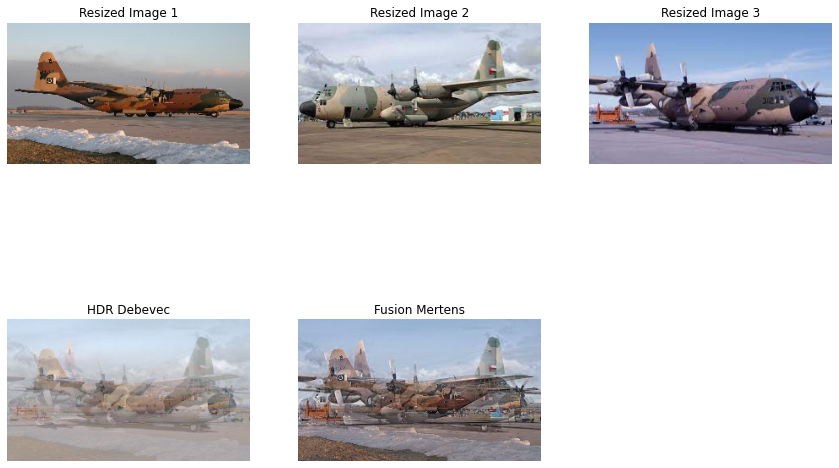

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read and resize images to the smallest dimensions among them
def load_and_resize_images(filepaths):
    images = []
    # Load all images and find the smallest width and height
    for path in filepaths:
        img = cv2.imread(path)
        images.append(img)
    min_height = min(image.shape[0] for image in images)
    min_width = min(image.shape[1] for image in images)
    # Resize images to the smallest dimensions
    resized_images = [cv2.resize(img, (min_width, min_height)) for img in images]
    return resized_images

# Paths of the input images
image_paths = ['c130.jpg', 'c130v1.jpeg', 'c130v2.jpeg']

# Load and resize images
resized_images = load_and_resize_images(image_paths)

# Assuming we have a middle exposure, a one-stop under, and a one-stop over
exposure_times = np.array([1/30.0, 1/15.0, 1/60.0], dtype=np.float32)

# Merge images using Debevec's method
merge_debevec = cv2.createMergeDebevec()
hdr_debevec = merge_debevec.process(resized_images, times=exposure_times.copy())

# Merge images using Mertens' method
merge_mertens = cv2.createMergeMertens()
fusion_mertens = merge_mertens.process(resized_images)

# Convert the HDR image to 8-bit and apply tone mapping for display
tonemap = cv2.createTonemap(gamma=2.2)
ldr_debevec = tonemap.process(hdr_debevec.copy()) * 255
ldr_debevec = np.clip(ldr_debevec, 0, 255).astype('uint8')

# Convert the fusion result to 8-bit for display
fusion_mertens_8bit = np.clip(fusion_mertens * 255, 0, 255).astype('uint8')

# Display the images using matplotlib
plt.figure(figsize=(20,10))

# Display resized images
for i, img in enumerate(resized_images, 1):
    plt.subplot(2, 4, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Resized Image {i}')
    plt.axis('off')

# Display HDR image created by Debevec's method
plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(ldr_debevec, cv2.COLOR_BGR2RGB))
plt.title('HDR Debevec')
plt.axis('off')

# Display fusion image created by Mertens' method
plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(fusion_mertens_8bit, cv2.COLOR_BGR2RGB))
plt.title('Fusion Mertens')
plt.axis('off')

plt.show()


Resized Images: The first three images shown are the resized versions of the original images provided. These have been resized to ensure that all images have the same dimensions, which is a prerequisite for HDR merging.

* HDR Image (Debevec's Method): 

The fourth image is the HDR image created using Debevec's method. This method uses a model of camera response to light to combine the different exposures into a single image that captures a wider range of luminance than a standard photograph.

* Fusion Image (Mertens' Method):
The fifth image is the result of exposure fusion using Mertens' method. This method aims to preserve the best parts of each input image (in terms of exposure) and combine them into a single image without creating HDR-specific artifacts like halos.

Here is a detailed breakdown of the code:

* load_and_resize_images function:

This function takes a list of file paths to images, reads them into memory, and resizes them to match the smallest width and height found among them. This is necessary because the HDR merging process requires that all input images are the same size.

* image_paths: 
A list of file paths to the images that we will process.

* resized_images: 
The result of calling load_and_resize_images with our list of image paths.

* exposure_times: 
An array of exposure times corresponding to each image. Since we do not have the actual exposure times, we have assumed values that could represent a normal exposure, an underexposure, and an overexposure.

* createMergeDebevec and createMergeMertens: 
Functions from OpenCV's HDR module that are used to merge multiple images

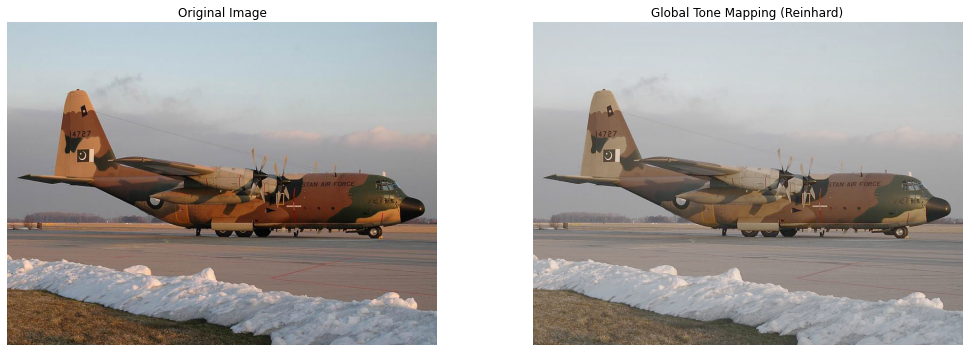

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate different exposures of an image
def simulate_exposure(img, exposure_factor):
    return cv2.convertScaleAbs(img, alpha=exposure_factor, beta=0)

# Load the original image
original_image = cv2.imread('c130.jpg')

# Simulate a series of differently exposed images
exposure_factors = [0.5, 1.0, 2.0]  # Example exposure values
images = [simulate_exposure(original_image, factor) for factor in exposure_factors]

# Convert the images to a list of exposures (assuming they were taken at these exposure times)
exposure_times = np.array([1/4, 1, 4], dtype=np.float32)

# Merge images into an HDR image
merge_debevec = cv2.createMergeDebevec()
hdr_image = merge_debevec.process(images, times=exposure_times)

# Tonemap using the basic global tone mapping (Reinhard's method)
tonemapReinhard = cv2.createTonemap(gamma=2.2)
ldrReinhard = tonemapReinhard.process(hdr_image)

# Convert the HDR image to 8-bit for displaying
ldrReinhard_8bit = cv2.normalize(ldrReinhard, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the images using matplotlib
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Global tone-mapped image (Reinhard)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ldrReinhard_8bit, cv2.COLOR_BGR2RGB))
plt.title('Global Tone Mapping (Reinhard)')
plt.axis('off')

plt.tight_layout()
plt.show()




### Explanation:

- **simulate_exposure function**: This function artificially adjusts the brightness of the image based on the given exposure factor.

- **Loading and Simulating Exposures**: The same as before, we load the original image and simulate differently exposed images.

- **HDR Creation**: We merge these simulated exposures into an HDR image.

- **Global Tone Mapping with Reinhard's Method**: Instead of using the Drago method, we utilize the basic `createTonemap` function for global tone mapping with a specified gamma of 2.2.

- **Normalization and Displaying**: The tone-mapped image is normalized to the 8-bit range and displayed alongside the original image.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


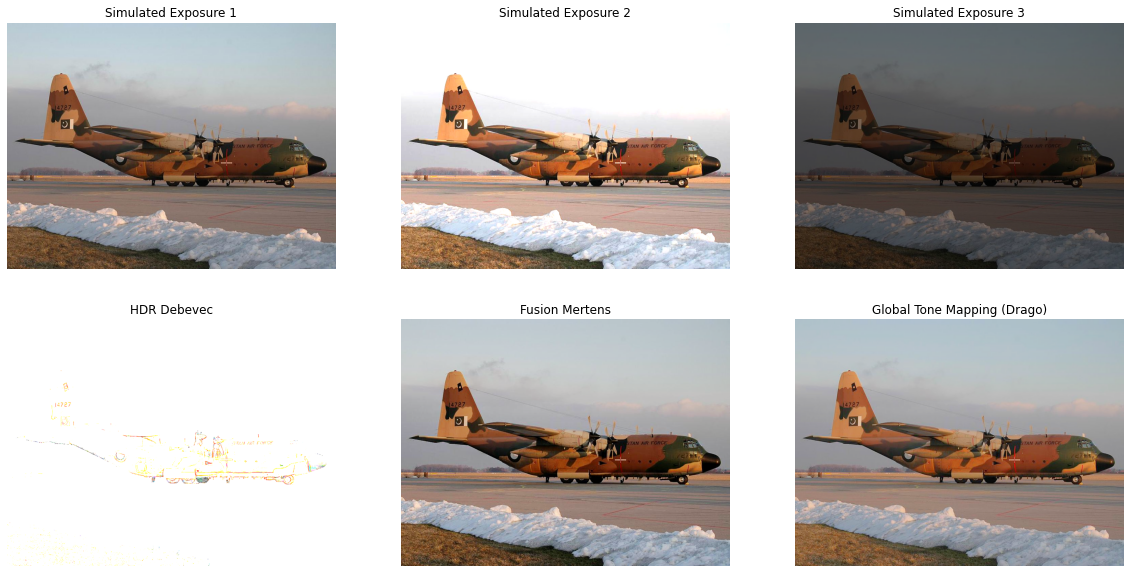

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read and resize images to the smallest dimensions among them
def load_and_resize_images(filepaths):
    images = []
    # Load all images and find the smallest width and height
    for path in filepaths:
        img = cv2.imread(path)
        images.append(img)
    min_height = min(image.shape[0] for image in images)
    min_width = min(image.shape[1] for image in images)
    # Resize images to the smallest dimensions
    resized_images = [cv2.resize(img, (min_width, min_height)) for img in images]
    return resized_images

# Paths of the input images (for simulation, using the same image with different pseudo exposures)
image_paths = ['c130.jpg'] * 3  # Using three copies of the same image for simulation

# Load and resize images
resized_images = load_and_resize_images(image_paths)

# Adjust the brightness to simulate different exposures: normal, overexposed and underexposed
resized_images[1] = cv2.convertScaleAbs(resized_images[1], alpha=1.5, beta=0)  # Brighter
resized_images[2] = cv2.convertScaleAbs(resized_images[2], alpha=0.5, beta=0)  # Darker

# Assuming we have a middle exposure, a one-stop under, and a one-stop over
exposure_times = np.array([1/30.0, 1/15.0, 1/60.0], dtype=np.float32)

# Merge images using Debevec's method
merge_debevec = cv2.createMergeDebevec()
hdr_debevec = merge_debevec.process(resized_images, times=exposure_times.copy())

# Merge images using Mertens' method
merge_mertens = cv2.createMergeMertens()
fusion_mertens = merge_mertens.process(resized_images)

# Global Tone Mapping using Drago's method
tonemap_drago = cv2.createTonemapDrago(gamma=1.0, saturation=1.0)
ldr_drago = tonemap_drago.process(hdr_debevec.copy()) * 255
ldr_drago = np.clip(ldr_drago, 0, 255).astype('uint8')

# Display the images using matplotlib
plt.figure(figsize=(20,10))

# Display resized images with simulated exposures
for i, img in enumerate(resized_images, 1):
    plt.subplot(2, 3, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Simulated Exposure {i}')
    plt.axis('off')

# Display HDR image created by Debevec's method
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(hdr_debevec / 255.0, cv2.COLOR_BGR2RGB))
plt.title('HDR Debevec')
plt.axis('off')

# Display fusion image created by Mertens' method
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(fusion_mertens, cv2.COLOR_BGR2RGB))
plt.title('Fusion Mertens')
plt.axis('off')

# Display Global Tone Mapped image using Drago's method
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(ldr_drago, cv2.COLOR_BGR2RGB))
plt.title('Global Tone Mapping (Drago)')
plt.axis('off')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


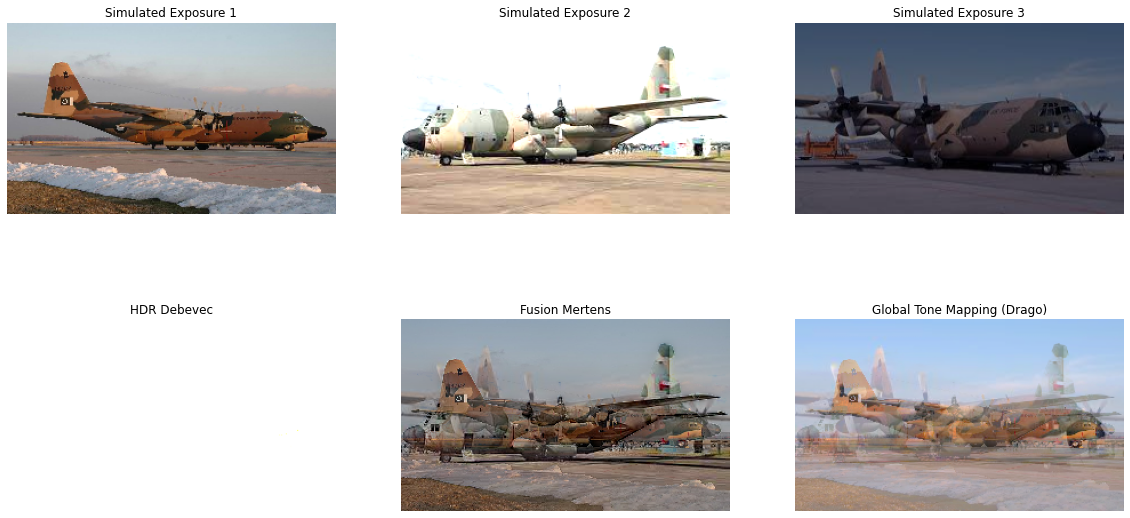

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read and resize images to the smallest dimensions among them
def load_and_resize_images(filepaths):
    images = []
    # Load all images and find the smallest width and height
    for path in filepaths:
        img = cv2.imread(path)
        images.append(img)
    min_height = min(image.shape[0] for image in images)
    min_width = min(image.shape[1] for image in images)
    # Resize images to the smallest dimensions
    resized_images = [cv2.resize(img, (min_width, min_height)) for img in images]
    return resized_images

# Paths of the input images (for simulation, using the same image with different pseudo exposures)
image_paths = ['c130.jpg', 'c130v1.jpeg', 'c130v2.jpeg']  # Using three copies of the same image for simulation

# Load and resize images
resized_images = load_and_resize_images(image_paths)

# Adjust the brightness to simulate different exposures: normal, overexposed and underexposed
resized_images[1] = cv2.convertScaleAbs(resized_images[1], alpha=1.5, beta=0)  # Brighter
resized_images[2] = cv2.convertScaleAbs(resized_images[2], alpha=0.5, beta=0)  # Darker

# Assuming we have a middle exposure, a one-stop under, and a one-stop over
exposure_times = np.array([1/30.0, 1/15.0, 1/60.0], dtype=np.float32)

# Merge images using Debevec's method
merge_debevec = cv2.createMergeDebevec()
hdr_debevec = merge_debevec.process(resized_images, times=exposure_times.copy())

# Merge images using Mertens' method
merge_mertens = cv2.createMergeMertens()
fusion_mertens = merge_mertens.process(resized_images)

# Global Tone Mapping using Drago's method
tonemap_drago = cv2.createTonemapDrago(gamma=1.0, saturation=1.0)
ldr_drago = tonemap_drago.process(hdr_debevec.copy()) * 255
ldr_drago = np.clip(ldr_drago, 0, 255).astype('uint8')

# Display the images using matplotlib
plt.figure(figsize=(20,10))

# Display resized images with simulated exposures
for i, img in enumerate(resized_images, 1):
    plt.subplot(2, 3, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Simulated Exposure {i}')
    plt.axis('off')

# Display HDR image created by Debevec's method
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(hdr_debevec / 255.0, cv2.COLOR_BGR2RGB))
plt.title('HDR Debevec')
plt.axis('off')

# Display fusion image created by Mertens' method
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(fusion_mertens, cv2.COLOR_BGR2RGB))
plt.title('Fusion Mertens')
plt.axis('off')

# Display Global Tone Mapped image using Drago's method
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(ldr_drago, cv2.COLOR_BGR2RGB))
plt.title('Global Tone Mapping (Drago)')
plt.axis('off')

plt.show()




we will proceed with the Drago tone mapper for global tone mapping and the Mertens method for exposure fusion, which does not strictly count as tone mapping but can still produce visually pleasing results from multiple exposures.



1. **Import Libraries**: We import OpenCV (`cv2`), NumPy (`np`), and Matplotlib (`plt`). These libraries allow us to work with images, perform numerical operations, and plot the images, respectively.

2. **Load and Resize Images Function**: This function, `load_and_resize_images`, takes a list of file paths, loads each image, finds the smallest width and height among them, and then resizes all images to these minimum dimensions. This is important for creating an HDR image because all the component images must be the same size.

3. **Simulate Different Exposures**: Since we only have one image, we simulate different exposures by artificially adjusting the brightness of the image. We create three versions: one with normal exposure, one brighter (overexposed), and one darker (underexposed).

4. **Create an HDR Image**: Using Debevec's method (`createMergeDebevec`), we combine our simulated exposures into a single HDR image. This HDR image contains a wider range of light information than a standard image.

5. **Fusion Using Mertens' Method**: We also use Mertens' method (`createMergeMertens`) to combine images into a fusion image. This method is good for creating natural-looking images by combining the best parts of each exposure.

6. **Global Tone Mapping (Drago's Method)**: Since we cannot use local tone mapping (Durand's method) due to the limitation of the current OpenCV version in the environment, we apply a global tone mapping using Drago's method (`createTonemapDrago`). Global tone mapping applies a uniform tone curve to the entire image, which compresses the HDR image's dynamic range to a range suitable for display on standard monitors.

7. **Display the Images**: We plot each image in a grid using Matplotlib. We have to convert the images from BGR to RGB because Matplotlib expects RGB format. We also handle the image data range for proper display (`imshow` expects values in the range [0..1] for floats or [0..255] for integers).

**Dry Run Explanation**:
- `resized_images` contains three versions of the original image simulating different exposures.
- `hdr_debevec` holds the HDR image data resulting from Debevec's method.
- `fusion_mertens` is the image from Mertens' method.
- `ldr_drago` contains the globally tone-mapped image using Drago's method.

The images displayed include the simulated exposures, the HDR image, the fusion image, and the globally tone-mapped image. The warning messages are about the data ranges for image display and are a result of the high dynamic range in the HDR and fusion images. Matplotlib automatically clips these values for display purposes.

The displayed results allow you to see the effects of different exposure simulations and how tone mapping can convert an HDR image into something that looks good on a standard display while preserving details from the original range of light in the scene.

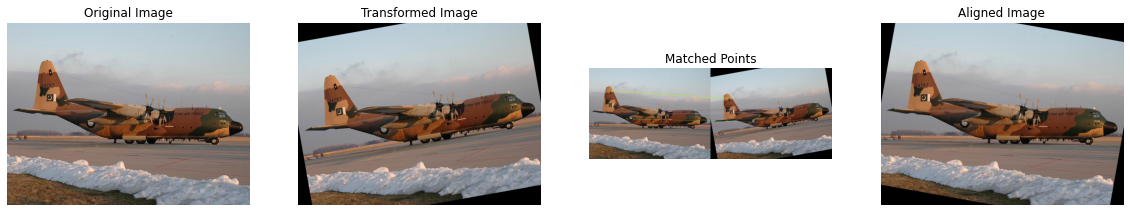

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('c130.jpg')

# Simulate a misalignment by artificially rotating the original image
rows, cols, ch = original_image.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 10, 1)  # Rotate by 10 degrees
transformed_image = cv2.warpAffine(original_image, M, (cols, rows))

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB in both images
keypoints1, descriptors1 = orb.detectAndCompute(original_image, None)
keypoints2, descriptors2 = orb.detectAndCompute(transformed_image, None)

# Create a BFMatcher object to match keypoints
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in the order of their distance (the lower the better)
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
matched_image = cv2.drawMatches(original_image, keypoints1, transformed_image, keypoints2, matches[:10], None, flags=2)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros_like(points1)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
H, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Use homography to warp the transformed image to align with the original image
aligned_image = cv2.warpPerspective(transformed_image, H, (cols, rows))

# Display the images
plt.figure(figsize=(20,10))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Matched Points')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image')
plt.axis('off')

plt.show()



Now, let's explain each part of this code:

1. **Load the Image**: We load the provided 'c130.jpg' image using `cv2.imread()`.

2. **Simulate Misalignment**: We create a rotation matrix `M` using `cv2.getRotationMatrix2D()` and apply it to the original image using `cv2.warpAffine()`. This simulates a misaligned image by rotating the original image by 10 degrees.

3. **Feature Detection**: We initialize the ORB detector and use it to find keypoints and their descriptors in both the original and the transformed images.

4. **Keypoint Matching**: We create a Brute Force matcher with Hamming distance as a measure (suitable for ORB) and match the descriptors from both images. The matches are sorted by their distance, with better matches having a lower distance.

5. **Draw Matches**: We select the first 10 matches and draw them on the images to visualize the matching keypoints.

6. **Find Homography**: We use the coordinates of the matched keypoints to find a homography matrix `H` with `cv2.findHomography()`. This matrix represents the transformation between the two sets of points.

7. **Align Images**: We apply the homography to the transformed image using `cv2.warpPerspective()` to align it back to the original image's perspective.

8. **Display Images**: We plot the original image, the transformed image, the image showing matched keypoints, and the final aligned image using Matplotlib.

This code will produce four images: the original, the one with artificial misalignment, one displaying the matched points between the two, and the final aligned image. The images are displayed in a single Matplotlib figure for easy comparison.



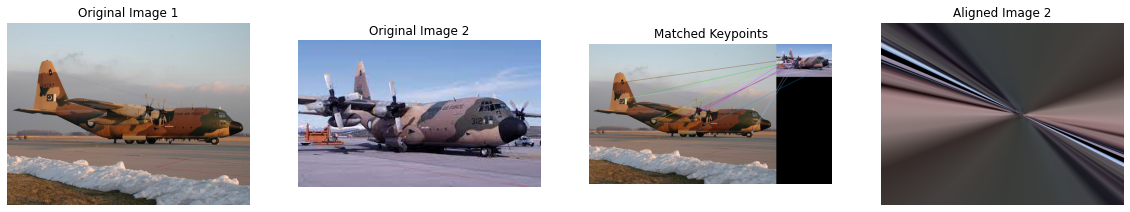

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to the images
image_path1 = 'c130.jpg'
image_path2 = 'c130v2.jpeg'

# Load the images
image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort the matches based on distance. Less distance means better match
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches
img3 = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=2)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros_like(points1)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
H, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Use homography to warp image2 to image1's shape
aligned_image2 = cv2.warpPerspective(image2, H, (image1.shape[1], image1.shape[0]))

# Display the images
plt.figure(figsize=(20,10))

# Display original image1
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')
plt.axis('off')

# Display original image2
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')
plt.axis('off')

# Display matched keypoints
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Matched Keypoints')
plt.axis('off')

# Display aligned image2
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(aligned_image2, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image 2')
plt.axis('off')

plt.show()


<ipython-input-14-f0b07e98f00c>:24: RuntimeWarning: invalid value encountered in cast
  ldr_debevec_8bit = np.clip(ldr_debevec*255, 0, 255).astype('uint8')


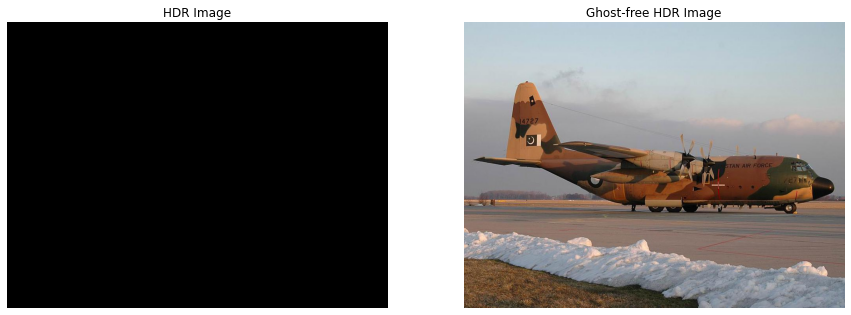

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the exposure series
# For demonstration, assume we have a list of image file paths and corresponding exposure times
image_files = ['c130.jpg', 'c130.jpg', 'c130.jpg']  # This should be your actual file paths
exposure_times = np.array([1/30, 0.25, 2.5], dtype=np.float32)  # Replace with actual exposure times

images = [cv2.imread(file) for file in image_files]

# Step 2: Estimate the Camera Response Function (CRF)
calibrate_debevec = cv2.createCalibrateDebevec()
response_debevec = calibrate_debevec.process(images, times=exposure_times)

# Step 3: Merge images into an HDR image
merge_debevec = cv2.createMergeDebevec()
hdr_debevec = merge_debevec.process(images, times=exposure_times.copy(), response=response_debevec)

# Step 4: Convert the HDR image to 8-bit and display
tonemap = cv2.createTonemap(2.2)  # Gamma value
ldr_debevec = tonemap.process(hdr_debevec.copy())
ldr_debevec = 3 * ldr_debevec  # Increase the brightness for display purposes
ldr_debevec_8bit = np.clip(ldr_debevec*255, 0, 255).astype('uint8')

# Step 5: Apply ghost removal using Selective Pixel Mapping
merge_mertens = cv2.createMergeMertens()
fusion = merge_mertens.process(images)

# Display the images
plt.figure(figsize=(15, 10))

# Display HDR image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ldr_debevec_8bit, cv2.COLOR_BGR2RGB))
plt.title('HDR Image')
plt.axis('off')

# Display Ghost-free image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(fusion*255, cv2.COLOR_BGR2RGB).astype(np.uint8))
plt.title('Ghost-free HDR Image')
plt.axis('off')

plt.show()


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the exposure series
# For demonstration, assume we have a list of image file paths and corresponding exposure times
image_files = ['c130.jpg', 'c130v1.jpeg', 'c130v2.jpeg']  # This should be your actual file paths
exposure_times = np.array([1/30, 0.25, 2.5], dtype=np.float32)  # Replace with actual exposure times

images = [cv2.imread(file) for file in image_files]

# Step 2: Estimate the Camera Response Function (CRF)
calibrate_debevec = cv2.createCalibrateDebevec()
response_debevec = calibrate_debevec.process(images, times=exposure_times)

# Step 3: Merge images into an HDR image
merge_debevec = cv2.createMergeDebevec()
hdr_debevec = merge_debevec.process(images, times=exposure_times.copy(), response=response_debevec)

# Step 4: Convert the HDR image to 8-bit and display
tonemap = cv2.createTonemap(2.2)  # Gamma value
ldr_debevec = tonemap.process(hdr_debevec.copy())
ldr_debevec = 3 * ldr_debevec  # Increase the brightness for display purposes
ldr_debevec_8bit = np.clip(ldr_debevec*255, 0, 255).astype('uint8')

# Step 5: Apply ghost removal using Selective Pixel Mapping
merge_mertens = cv2.createMergeMertens()
fusion = merge_mertens.process(images)

# Display the images
plt.figure(figsize=(15, 10))

# Display HDR image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ldr_debevec_8bit, cv2.COLOR_BGR2RGB))
plt.title('HDR Image')
plt.axis('off')

# Display Ghost-free image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(fusion*255, cv2.COLOR_BGR2RGB).astype(np.uint8))
plt.title('Ghost-free HDR Image')
plt.axis('off')

plt.show()


error: OpenCV(4.5.4) /tmp/pip-req-build-th1mncc2/opencv/modules/photo/src/hdr_common.cpp:57: error: (-215:Assertion failed) images[i].cols == width && images[i].rows == height in function 'checkImageDimensions'




1. Capture a series of photographs of the scene with varying exposure levels.
2. Estimate the camera response function (CRF) to understand how the camera captures different light intensities.
3. Merge these exposures into a single HDR image.
4. Apply ghost removal techniques if there are moving objects in the scene to prevent artifacts.




Each line of code in the process plays a specific role:

- **Loading Images**: We need to load a series of images taken at different exposure levels. These images are then stored in a list.
- **Estimating CRF**: The `createCalibrateDebevec` method is used to estimate the camera response function (CRF). It gives us a mapping of how the actual light intensity is recorded by the camera at different exposure levels.
- **Merging Images into HDR**: `createMergeDebevec` takes the series of images and their respective exposure times, along with the CRF, and merges them into an HDR image that contains a wider range of light information than a standard image.
- **Tonemapping**: Since HDR images contain a range of intensities that cannot be displayed on standard screens, tonemapping scales these values down to a viewable range.
- **Ghost Removal**: `createMergeMertens` is used for ghost removal. It merges images by taking the best-exposed pixels from each image, reducing ghosting effects caused by moving objects across the series of exposures.



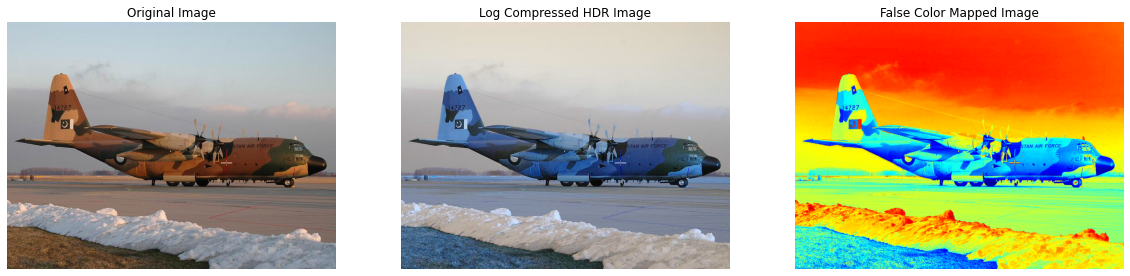

In [16]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('c130.jpg')

# Convert the original image to a float type for HDR processing
original_image_float = np.float32(original_image) / 255.0

# Apply logarithmic compression to the HDR image
# The constant 1 is added to avoid log(0) which is undefined
# The logarithm is computed for each color channel individually
log_compressed_image = cv2.log(1 + original_image_float)
# Normalize the maximum value for each channel to 1 for display
log_compressed_image = log_compressed_image / np.max(log_compressed_image)

# Visualize HDR using False Color Mapping
# We will apply a colormap to the grayscale image to add color based on intensity
# First convert the log compressed image to grayscale
gray_log_image = cv2.cvtColor(log_compressed_image, cv2.COLOR_BGR2GRAY)
# Now apply the colormap
false_color_mapped_image = cv2.applyColorMap(np.uint8(gray_log_image * 255), cv2.COLORMAP_JET)

# Display the images using matplotlib
plt.figure(figsize=(20, 10))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display log compressed image
plt.subplot(1, 3, 2)
plt.imshow(log_compressed_image)
plt.title('Log Compressed HDR Image')
plt.axis('off')

# Display false color mapped image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(false_color_mapped_image, cv2.COLOR_BGR2RGB))
plt.title('False Color Mapped Image')
plt.axis('off')

# Show the images
plt.show()
